In [1]:
# Necessary Imports
%matplotlib inline

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Read Dataset
dataset = pd.read_csv("../Data/combinedclimatedata.csv")
dataset = dataset.drop(["Unnamed: 0"], axis = 1)
dataset.head()

,Year,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,population_millions,GMSL,CO2_concentration_per_million
0,1993,15.466417,0.059167,5581597.598,90.471622,869.636645
1,1994,15.535000,0.058583,5663150.428,89.516216,863.100924
2,1995,15.637833,0.060417,5744212.930,87.334722,858.225479
3,1996,15.524667,0.059500,5824891.931,85.473243,859.062572
4,1997,15.713833,0.059167,5905045.647,99.442432,867.379574


In [3]:
# Let X = Population & y = LandAndOceanAverageTemperature
X = dataset["population_millions"].values.reshape(-1, 1)
y = dataset["LandAndOceanAverageTemperature"].values.reshape(-1, 1)

In [4]:
# Split Train - 80% Train & 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Train Algorithm Using Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
# Retrieve Intercept:
print("The y intercept is:  ", regressor.intercept_)

# Retrieve Slope:
print("The slope is:  ", regressor.coef_)

The y intercept is:   [14.35225079]
The slope is:   [[2.1729278e-07]]


In [7]:
# Make Predictions
y_pred = regressor.predict(X_test)

In [8]:
# Compare Actual To Predicted
actual_predicted_df = pd.DataFrame({"Actual" : y_test.flatten(), "Predicted" : y_pred.flatten(), "Error" : y_pred.flatten() - y_test.flatten()})
actual_predicted_df

,Actual,Predicted,Error
0,15.757250,15.756214,-0.001036
1,15.826583,15.738836,-0.087747
2,15.913000,15.937465,0.024465
3,15.827333,15.809405,-0.017929
4,15.854417,15.919058,0.064642


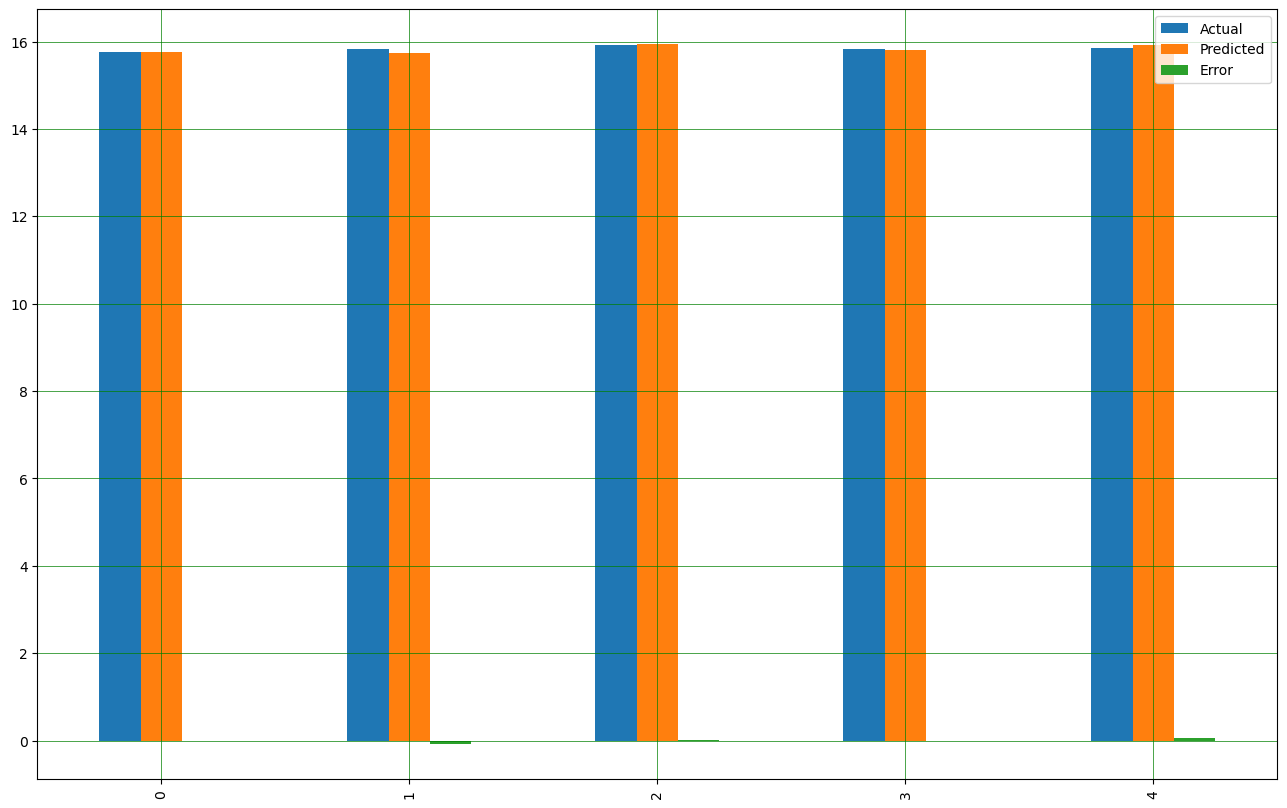

In [9]:
# Create Bar Chart
actual_predicted_df = actual_predicted_df.head(23)
actual_predicted_df.plot(kind = "bar", figsize = (16, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

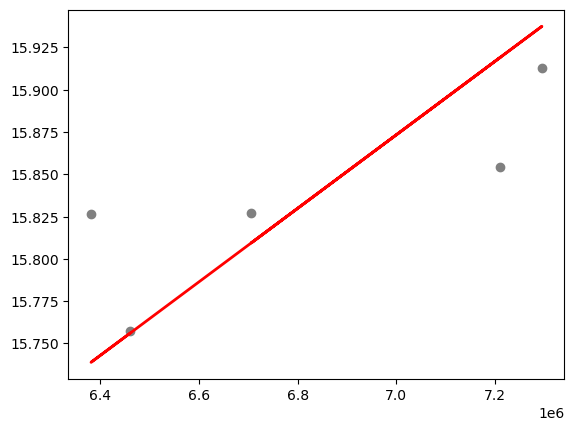

In [10]:
# Plot Straight Line With Test Data
plt.scatter(X_test, y_test,  color = "gray")
plt.plot(X_test, y_pred, color = "red", linewidth = 2)
plt.show()

In [11]:
# Calculate Margin Of Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))  
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03916362092268386
Mean Squared Error: 0.0025598238844166733
Root Mean Squared Error: 0.050594702137839224


In [12]:
x_min = X.min()
x_max = X.max()
print("Min/Max X Values (Population)", x_min, x_max)

Min/Max X Values (Population) 5581597.597999998 7379796.967


In [13]:
# Get y (Temperature Min/Max Actuals)
y_min_actual = y.min()
y_max_actual = y.max()
print("Min/Max Y Values (Temperature)", y_min_actual, y_max_actual)

Min/Max Y Values (Temperature) 15.466416666666667 16.058583333333335


In [14]:
# Y-Intercept = 14.35225079 & Slope = 2.1729278e-07
y_min = 14.35225079 + 2.1729278e-07 * x_min
y_max = 14.35225079 + 2.1729278e-07 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 15.466416666666667
Calculated Min Value: 15.565091648910741
Actual Max Value: 16.058583333333335
Calculated Max Value: 15.955827388794997


In [15]:
# Predict Calculated Values
y_min_predicted = regressor.predict([[x_min]])
y_max_predicted = regressor.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 15.466416666666667
Predicted Min Value: [[15.56509165]]
Actual Max Value: 16.058583333333335
Predicted Max Value: [[15.95582739]]


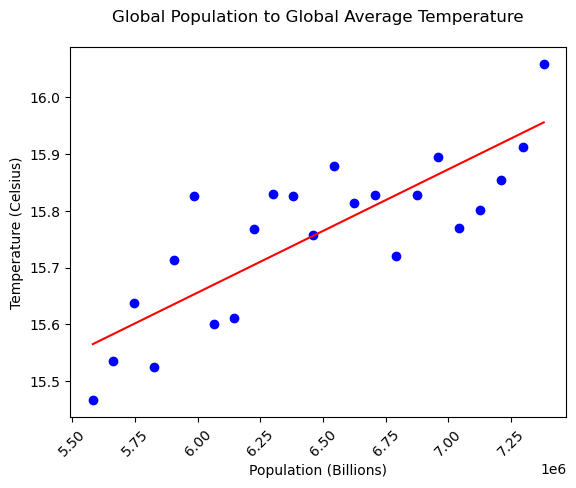

In [16]:
# Plot
plt.scatter(X, y, c = "blue")
plt.plot([x_min, x_max], [y_min, y_max], c = "red")
plt.xticks(rotation = 45)
plt.xlabel("Population (Billions)")
plt.ylabel("Temperature (Celsius)")
plt.title("Global Population to Global Average Temperature\n")
fig1 = plt.gcf()
fig1.savefig("../Images/PopToTemp.png", bbox_inches = "tight")

## Plugging In The Numbers:
### Average Global Temperature  =  Slope  *  CO2  +  Y-Intercept
### Slope = 2.1729278e-07
### Y-Intercept = 14.35225079
### Global Temp. Above 1.5 Degrees C From 1850 Average Global Temperature = 16.37
### Population = (16.37 - 14.35225079)/0.00000021729278
### CO2 = 9,285,854.826884
### Mean Squared Error: 0.0025598238844166733